### Hyperparameters

In [6]:
EPOCHS = 20
BATCH_SIZE = 128

EMBEDDING_DIM = 100
LSTM_UNITS = 32

### Loading data

In [2]:
from data.norec.dataloader import load_full_dataset
from data.dataloader import load_data

# Load multiclass data
multiclass_dataset = load_full_dataset()
multiclass_data = load_data(multiclass_dataset)

Cleaning text...
Fitting tokenizer...
Converting texts to sequences...
Padding sequences...
One-hot encoding labels...
Done!
Cleaning text...
Fitting tokenizer...
Converting texts to sequences...
Padding sequences...
One-hot encoding labels...
Done!


# Classifying with multiclass dataset

In [3]:
X_train = multiclass_data['X_train']
X_val = multiclass_data['X_val']
X_test = multiclass_data['X_test']
y_train = multiclass_data['y_train']
y_val = multiclass_data['y_val']
y_test = multiclass_data['y_test']
num_words = multiclass_data['num_words']
maxlen = multiclass_data['maxlen']
num_classes = multiclass_data['num_classes']
multiclass_tokenizer = multiclass_data['tokenizer']

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)
print('num_words:', num_words)
print('maxlen:', maxlen)
print('num_classes:', num_classes)

X_train shape: (34903, 219)
X_val shape: (4360, 219)
X_test shape: (4351, 219)
y_train shape: (34903, 3)
y_val shape: (4360, 3)
y_test shape: (4351, 3)
num_words: 20000
maxlen: 219
num_classes: 3


In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=maxlen))
model.add(LSTM(LSTM_UNITS))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 219, 100)          2000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 2,017,123
Trainable params: 2,017,123
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
546/546 [==============================] - 25s 46ms/step - loss: 0.4951 - accuracy: 0.7961 - val_loss: 0.4790 - val_accuracy: 0.8037
Epoch 2/20
546/546 [==============================] - 25s 46ms/step - loss: 0.3523 - accuracy: 0.8613 - val_loss: 0.5237 - val_accuracy: 0.7899
Epoch 3/20
546/546 [==============================] - 26s 47ms/step - loss: 0.2247 - accuracy: 0.9186 - val_loss: 0.6481 - val_accuracy: 0.7975
Epoch 4/20
546/546 [==============================] - 25s 47ms/step - loss: 0.1307 - accuracy: 0.9550 - val_loss: 0.7582 - val_accuracy: 0.7851
Epoch 5/20
546/546 [==============================] - 26s 48ms/step - loss: 0.0816 - accuracy: 0.9734 - val_loss: 0.9616 - val_accuracy: 0.7881
Epoch 6/20
546/546 [==============================] - 26s 47ms/step - loss: 0.0537 - accuracy: 0.9830 - val_loss: 1.0567 - val_accuracy: 0.7603
Epoch 7/20
546/546 [==============================] - 25s 45ms/step - loss: 0.0406 - accuracy: 0.9879 - val_loss: 1.1676 - val_accuracy:

In [8]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=1)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

136/136 [==============================] - 3s 21ms/step - loss: 1.4362 - accuracy: 0.7837
Validation loss: 1.436210036277771
Validation accuracy: 0.7837278842926025


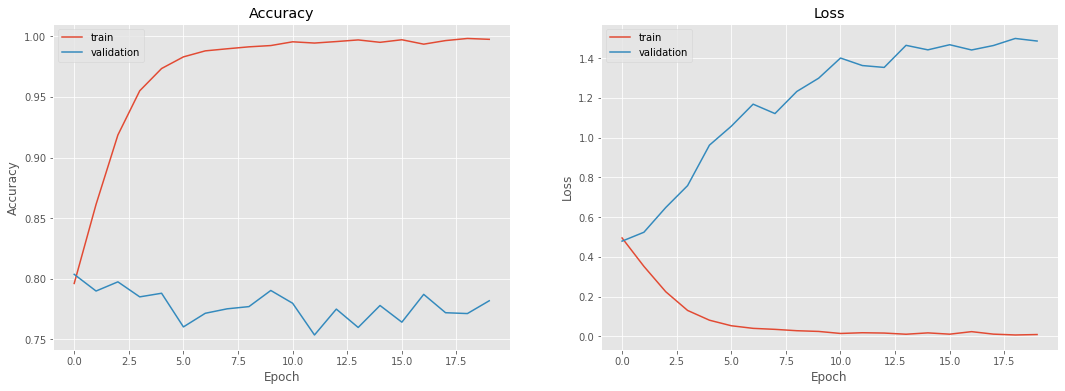

In [9]:
from utils.visualization import plot_history

plot_history(history, plot_name="baseline_model", save=False, show=True)